In [9]:
from models.dgp import *
from  models.source_estimator import *
import sys, importlib
import seaborn as sns
importlib.reload(sys.modules['models'])
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
J = 3
I = 2
n = 10000
A = np.random.uniform(low = -3, high = 3, size = (I,J))
S = np.random.laplace(size = (J,n)) 
X = (A @ S).T


In [4]:
est = SourceEstimator(noise= False)
est.fit(X,A)

Fitting the model to the data in the noiseless case


In [7]:
est.Signals

array([[ 3.32568462e-01, -5.49570329e-01, -1.18161508e-09],
       [ 3.51069945e-09, -2.11168259e+00, -5.31378099e-01],
       [ 3.42204645e-09, -3.29236339e-01, -1.33374575e+00],
       ...,
       [-1.72586267e+00,  1.68787819e-01,  1.15975525e-09],
       [ 7.88370953e-02, -1.50292204e-09,  5.97972720e-01],
       [ 7.98647824e-01, -1.28403270e-09,  7.23820782e-02]])

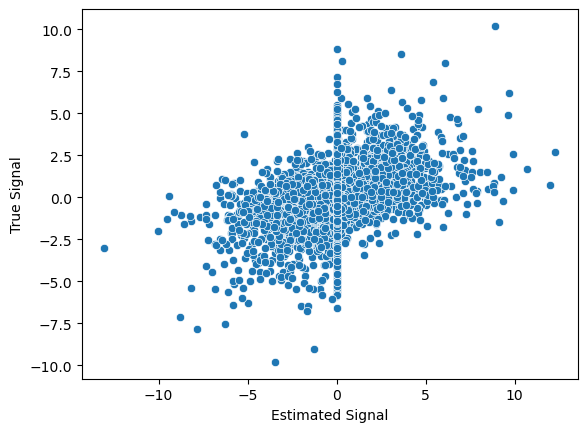

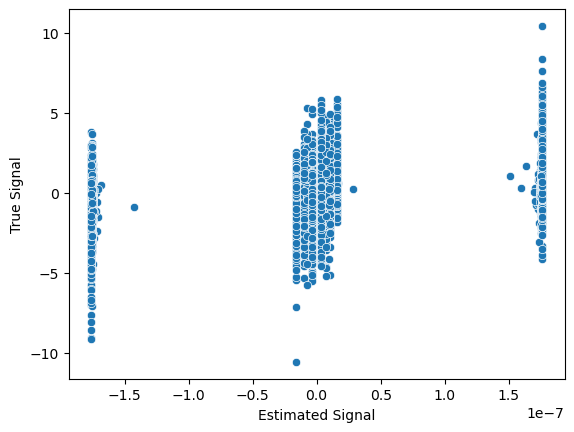

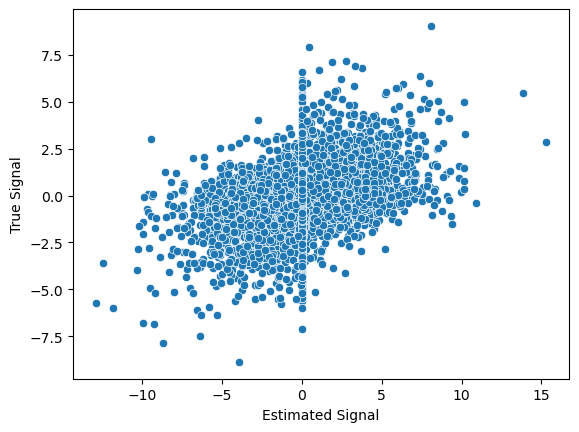

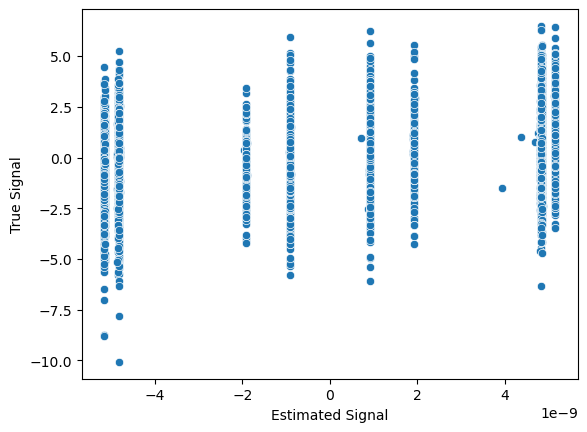

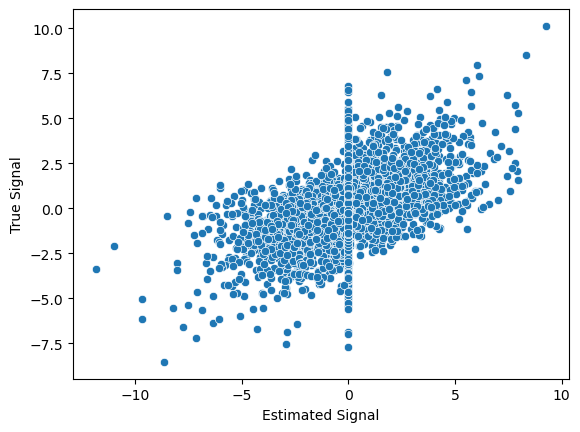

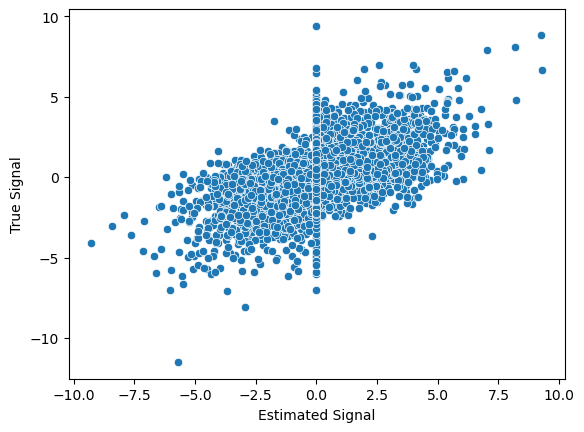

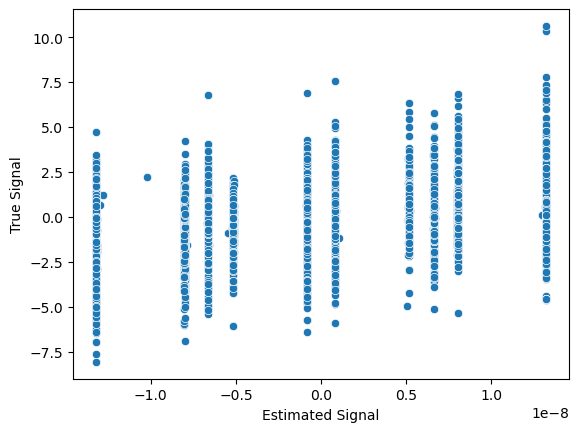

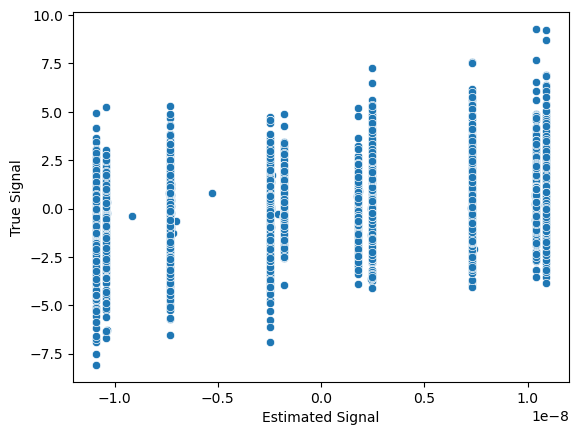

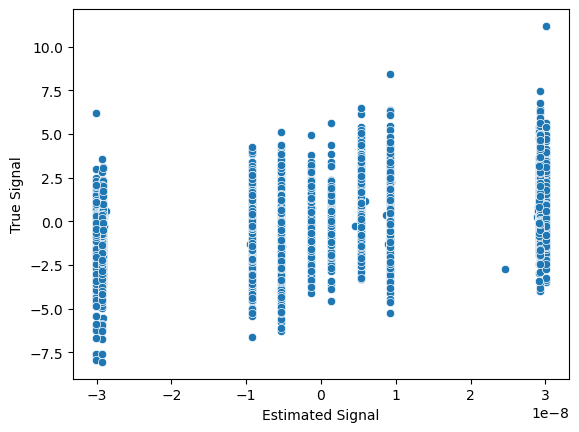

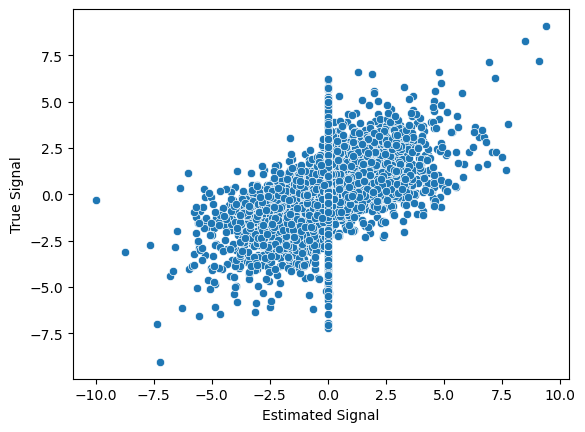

In [5]:
# plot the estimated signals vs the true signals 
for i in range(J):
    signal_est = est.Signals[:, i]
    signal_true = S[i,:]
    sns.scatterplot(x=signal_est, y=signal_true)
    plt.xlabel('Estimated Signal')
    plt.ylabel('True Signal')
    plt.show()

In [61]:
X_hat = A @ est.Signals.T

In [62]:
X_hat.T

array([[ 0.41557241,  4.13499189],
       [13.27686488, -2.69722869],
       [-0.02826453,  0.55315958],
       ...,
       [ 0.86791526, -2.34540832],
       [ 2.38349863, -1.00987314],
       [-1.9446275 ,  3.92833888]])

In [63]:
X.T

array([[ 0.41557241, 13.27686488, -0.02826453, ...,  0.86791526,
         2.38349863, -1.9446275 ],
       [ 4.13499189, -2.69722869,  0.55315958, ..., -2.34540832,
        -1.00987314,  3.92833888]])

Text(0, 0.5, 'True Signal')

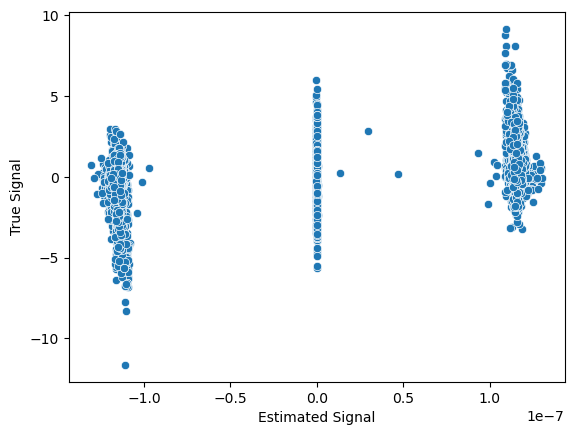

In [64]:
signal_est_2 = est.Signals[:, 2]
signal_true_2 = S[2, :]

sns.scatterplot(x=signal_est_2, y=signal_true_2)
plt.xlabel('Estimated Signal')
plt.ylabel('True Signal')

In [51]:
signal = np.random.laplace(size = (6,10000), loc = 0, scale = 1)
mat = np.random.rand(5,6)

obs = mat @ signal
print(obs.shape)
mat.shape

(5, 10000)


(5, 6)

In [52]:
est = SourceEstimator( noise = False)
est.fit(obs.T,mat)

Fitting the model to the data in the noiseless case


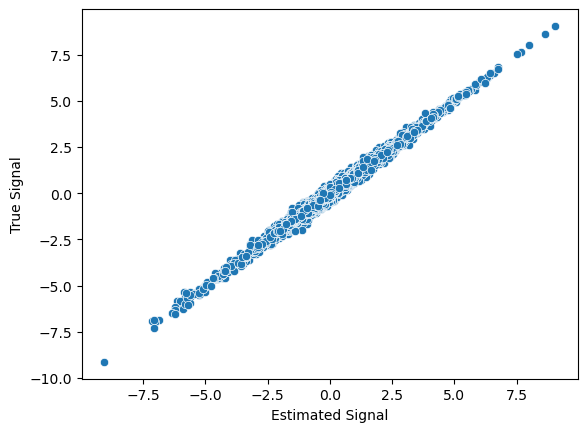

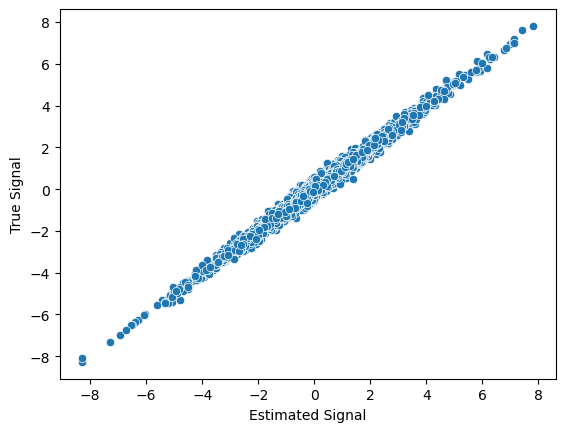

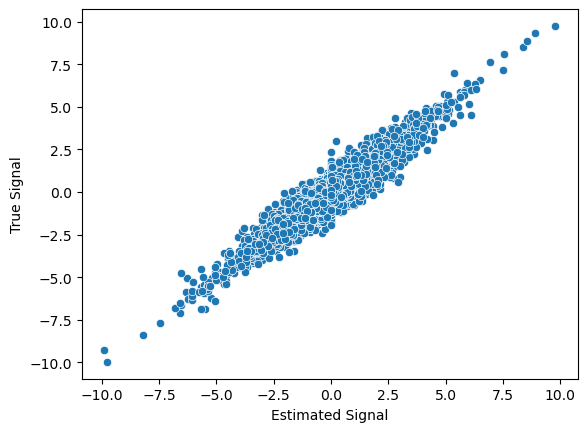

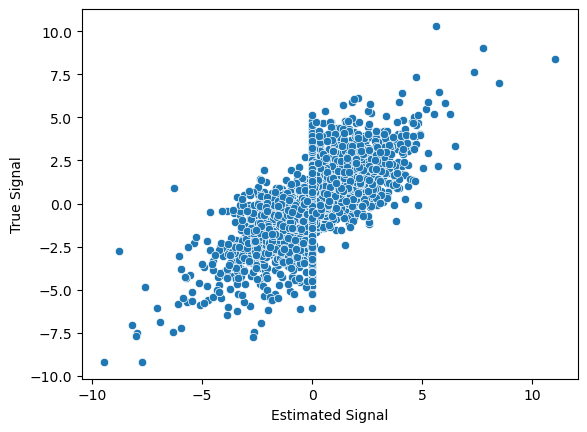

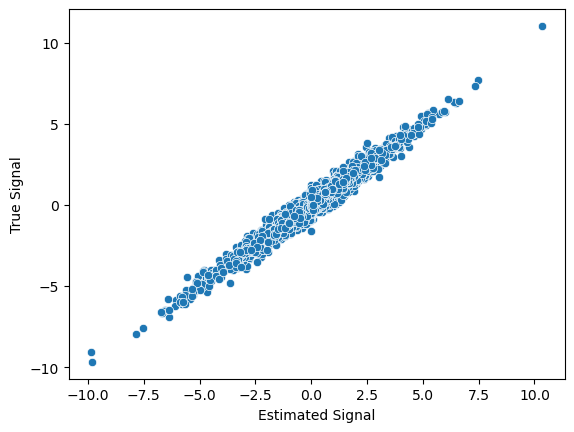

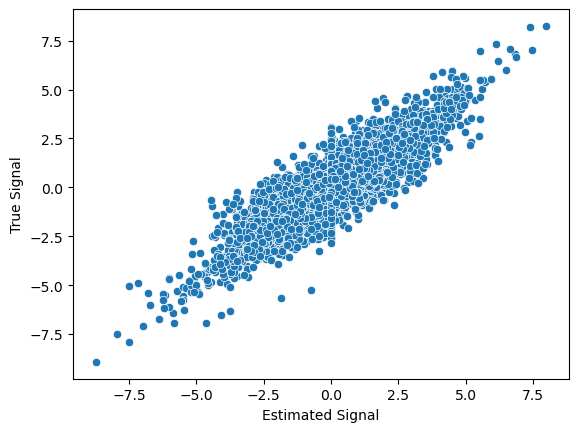

In [53]:
# plot the estimated signals vs the true signals 
for i in range(mat.shape[1]):
    signal_est = est.Signals[:, i]
    signal_true = signal[i, :]
    sns.scatterplot(x=signal_est, y=signal_true)
    plt.xlabel('Estimated Signal')
    plt.ylabel('True Signal')
    plt.show()

<Axes: >

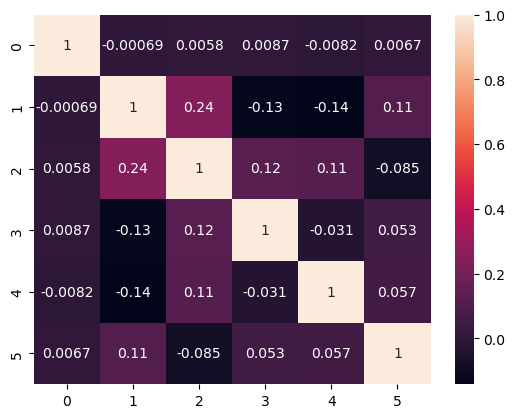

In [68]:
# correlation between the estimated signals
correlation = np.corrcoef(est.Signals.T)
sns.heatmap(correlation, annot=True)

In [125]:
data = pd.read_csv("sim_data_separate_signels/estimated_signals_separate_CausalVarEM_16.csv", header= 0)

In [126]:
pd.read_csv(f"sim_data/mixing_matrix/estimated_mixing_{16}.csv", header=0).values @ data.T


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,-0.027808,0.473284,-0.828291,-0.971782,0.047424,0.693398,-0.406679,-0.973272,-0.447686,-0.593823,...,0.832895,-0.146616,-2.364765,-0.124726,0.045793,-0.175358,-0.028196,0.285411,-1.056371,-0.088522
1,2.260856,-0.558389,0.883644,2.381549,0.133291,-0.430195,0.961651,1.786311,0.860912,1.035882,...,-1.862276,1.882330,6.036493,1.885847,0.115317,0.213834,1.307579,-0.656839,0.109428,0.592774
2,-0.416561,-0.052389,0.396769,0.413163,-1.189539,-0.169410,0.663099,-0.436492,0.209912,0.660578,...,0.958681,-0.036145,0.159914,0.444045,0.494467,0.837138,-0.052210,1.169376,0.715856,-0.424979
3,4.513822,0.472917,1.045901,0.979998,0.297546,-0.871039,-0.019230,2.640360,1.576858,1.334314,...,-1.532812,2.509237,8.441644,3.409781,0.052686,2.236363,1.172834,0.706083,-1.376317,2.376702
4,-8.002348,3.717257,-2.064753,-6.878788,-3.421725,-0.331634,-3.579379,-7.662232,-1.134118,-2.260244,...,8.048598,-6.137506,-20.700192,-6.105015,-0.513048,6.153269,-5.796376,6.005448,0.542709,1.270087


In [127]:
pd.read_csv(f"sim_data/data/data_obs_{0}.csv", header=0).values

array([[-0.49090227,  0.74453891, -2.13976353,  0.51282293, -4.22466631],
       [-0.37607426, -0.56663599, -0.66709285,  2.9280287 , -8.66587545],
       [ 0.06492549, -0.87669049,  2.39854438,  2.78596305, -6.42228623],
       ...,
       [ 0.49212343,  0.73682454, -0.51673733, -1.44200607,  3.75911578],
       [-0.38777325, -0.31876331, -2.40235197, -1.57943647,  0.95463325],
       [ 0.12250779, -0.50359604,  1.36806869,  2.06715267, -5.60835629]])

In [128]:
data

,0,1,2,3,4,5
0,-3.902432e-16,-0.027808,2.214415,-0.606133,0.017942,-1.080658
1,-1.054878e-16,0.473284,0.232029,0.053935,1.102668,0.749851
2,1.497813e-16,-0.828291,-0.499662,0.218392,0.138469,1.259260
3,1.745790e-16,-0.971782,0.758604,0.093232,-2.770795,2.558315
4,2.257719e-16,0.047424,0.212492,-1.194456,-0.047627,-1.520365
...,...,...,...,...,...,...
9995,3.453915e-16,-0.175358,-0.079026,0.797172,2.010210,4.778657
9996,-1.900687e-17,-0.028196,1.260489,-0.163395,-1.410149,-1.198295
9997,-9.986930e-17,0.285411,-0.180182,1.259832,1.755812,1.087147
9998,6.414997e-16,-1.056371,-1.654787,0.572085,-0.496808,2.045421


In [129]:
pd.read_csv("sim_data/signals/true_signals_0.csv", header=0).values 


array([[-0.84115767, -0.49090227,  1.99809705, -1.0499247 ,  0.1794987 ,
        -2.05007451],
       [-0.66676247, -0.37607426,  0.39369967,  0.16781943,  0.18837381,
        -0.4101813 ],
       [ 0.27721216,  0.06492549, -1.04248292,  2.25440505,  1.5448642 ,
         0.69078982],
       ...,
       [ 0.38605139,  0.49212343, -0.51985193, -1.60928721,  1.01890436,
        -0.2626802 ],
       [ 0.83447404, -0.38777325,  0.67144663, -1.5414671 , -0.35031131,
        -0.88618748],
       [ 0.05203755,  0.12250779, -0.81642946,  1.09609246,  1.1087018 ,
        -0.46223865]])

In [135]:
class SourceEstimator():
    """Estimate the sources based on paramteric assumption and the noisless mixing model"""
    
    def __init__(self, paras = None, noise = False):
        self.paras = paras
        self.noisy_case = noise
        # TODO: use paraemters to generalize 

    def fit(self, data, A_hat):
        """Fit the model to the data matrix by estimating the signals.
        
        Parameters:
        - data: a numpy array with n rows and I columns representing the data.
        - A_hat: an (I x J) matrix, the estimated mixing matrix.
        """
        if self.noisy_case:
            print("Fitting the model to the data in the noisy case")
            self._fit_noisy(data, A_hat)
        else:
            print("Fitting the model to the data in the noiseless case")
            self._fit_noiseless(data, A_hat)

    def _fit_noisy(self, data, A_hat):
        signals = cp.Variable((data.shape[0], A_hat.shape[1]))  # Signal matrix
        noise = cp.Variable(data.shape)  # Noise matrix

        # Define the objective to minimize the L1 norm of signals and the Frobenius norm of noise
        objective = cp.Minimize(cp.norm1(signals)*np.sqrt(2) + (1/2)*cp.norm(noise, 'fro')**2)

        # Define constraints
        constraints = [A_hat @ signals.T + noise.T == data.T]

        # Formulate and solve the problem
        problem = cp.Problem(objective, constraints)
        problem.solve()

        # Retrieve the solution
        self.Signals = signals.value 
       

    def _fit_noiseless(self, data, A_hat, lambda_: float = 100):
        signals = cp.Variable((data.shape[0], A_hat.shape[1]))

        objective = cp.Minimize(cp.norm1(signals) + lambda_ * cp.sum_squares(signals))

        # Define the equality constraint for all rows: A_hat * signal_row == data_row
        constraints = [A_hat @ signals.T == data.T]

        # Solve the problem
        problem = cp.Problem(objective, constraints)
        problem.solve()

        # Store the result
        self.Signals = signals.value

  

i = 16
data = pd.read_csv(f"sim_data/data/data_obs_{i}.csv", header=0).values
mixing_matrix_estimation = pd.read_csv(f"sim_data/mixing_matrix/estimated_mixing_{i}.csv", header=0).values
estimator = SourceEstimator(noise=False)
estimator.fit(data, mixing_matrix_estimation)
#pd.DataFrame(estimator.Signals).to_csv(f"sim_data_separate_signels/estimated_signals_separate_CausalVarEM_{i}.csv", index = False)

Fitting the model to the data in the noiseless case


In [136]:
estimator.Signals

array([[ 1.20858116e-02, -2.77733062e-02,  2.21435129e+00,
        -6.06136568e-01,  1.79836912e-02, -1.08059711e+00],
       [-2.74896693e-03,  4.73276528e-01,  2.32044064e-01,
         5.39361648e-02,  1.10265886e+00,  7.49837424e-01],
       [-2.14217919e-03, -8.28297409e-01, -4.99650474e-01,
         2.18392941e-01,  1.38461459e-01,  1.25924916e+00],
       ...,
       [-8.06043039e-03,  2.85388457e-01, -1.80139182e-01,
         1.25983487e+00,  1.75578419e+00,  1.08710649e+00],
       [-9.24593773e-03, -1.05639682e+00, -1.65473766e+00,
         5.72087471e-01, -4.96839718e-01,  2.04537462e+00],
       [-1.17001973e-02, -8.85551320e-02,  4.44998219e-01,
        -4.85042642e-01,  1.27277527e+00,  2.91211500e+00]])